In [2]:
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage.transform import resize
from keras.utils import to_categorical

In [3]:
X = np.zeros((3000, 150, 150, 3),dtype=np.uint8)
Y = np.zeros((3000, 1),dtype=np.uint8)
image_dir = "Dataset/seg_test/"

i=0
j=-1

for _,folders,_ in os.walk(image_dir):
    if(j>0):
        break
    for folder in folders:
        j+=1
        folder = image_dir + folder + "/"
        for _,_,images in os.walk(folder):
            for image in images:
                img = imread(folder+image)
                Y[i] = j
                try:
                    X[i] = img
                except ValueError:
                    shape = img.shape
                    X[i, :shape[0], :shape[1], :] = img
                i+=1

print(i)
print(j)

3000
5


In [4]:
print(Y.shape)
Y_oh = to_categorical(Y)
print(Y_oh.shape)

(3000, 1)
(3000, 6)


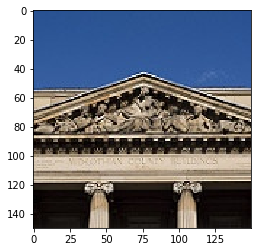

In [5]:
plt.imshow(X[4,:,:,:])
plt.show()

In [6]:
np.save("Models/X_test", X)
np.save("Models/Y_test", Y_oh)

In [3]:
X_pred = np.zeros((7300, 150, 150, 3))
image_dir = "Dataset/seg_pred/"

i=0

for _,_,images in os.walk(image_dir):
    for image in images:
        img = imread(image_dir+image)
        try:
            X_pred[i] = img
        except ValueError:
            try:
                print(i)
                shape = img.shape
                X_pred[i, :shape[0], :shape[1], :] = img
            except ValueError:
                print("specialError")
                print("Error image = " + image)
                continue
        i+=1
        
            
print(i)

1003
1096
1149
1380
1463
1503
2476
2736
3897
4498
5140
5263
6462
specialError
Error image = 7606.jpg
7300


In [4]:
np.save("Models/X_pred", X_pred)